In [4]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib

#Customize background and pallete colors 
sns.set_style("darkgrid")


Due to we have curated manually the sulfur cycle, we known which Pfams are involved in certain metabolic Pathways.
Therefore we have generated a file containing the PFAMS and the corresponding KO numbers and the name of the pathway involved, see the [tabular file](https://github.com/eead-csic-compbio/metagenome_Pfam_score/blob/master/Advanced_mode/input_sulfur_data/sulfur_score_kegg_list) provide in [MEBS sofware](https://eead-csic-compbio.github.io/metagenome_Pfam_score/)

# Added -comp option in MEBS
(april 30 2018) 

```bash
perl  mebs.pl -input mats_fasta/ -type metagenomic -fdr 0.0001 -comp > mats.fdr0.0001.tsv 
```

In [3]:
#%%bash 
#sed  -i 's/_metahit.final.contigs.fa.prodigal.faa//g' ../data/mats.fdr0.0001.tsv

In [5]:
#MEBS_mats=pd.read_table("../data/mats.fdr0.0001.tsv", index_col=0, sep="\t")
MEBS_mats =pd.read_table("../data/allmebs2.2plot.tab", index_col=0, sep="\t")

In [6]:
MEBS_comp=MEBS_mats.drop(['sulfur', 'carbon','oxygen','iron','nitrogen','<sulfur comp>', '<carbon comp>'],axis=1)
MEBS_comp.head()

,sulfur_1,sulfur_2,sulfur_3,sulfur_4,sulfur_5,sulfur_6,sulfur_7,sulfur_8,sulfur_9,sulfur_10,...,carbon_3,carbon_4,carbon_5,carbon_6,carbon_7,carbon_8,carbon_9,carbon_10,carbon_12,carbon_13
S9,100.0,70.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,70.0,...,100.0,36.4,75.0,50.0,92.9,66.7,28.6,100.0,37.5,0.0
S8,100.0,70.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,70.0,...,100.0,45.5,75.0,50.0,92.9,100.0,28.6,84.6,37.5,0.0
S6,100.0,60.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,70.0,...,100.0,36.4,100.0,50.0,85.7,100.0,28.6,84.6,37.5,0.0
S3,100.0,80.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,65.0,...,100.0,27.3,100.0,50.0,85.7,66.7,28.6,84.6,37.5,0.0
S7,100.0,70.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,70.0,...,100.0,45.5,100.0,50.0,92.9,100.0,28.6,92.3,37.5,0.0


In [7]:
MEBS_comp.rename(columns={'sulfur_1': 'Sulfite oxidation',
'sulfur_2':'Thiosulfate oxidation', 
'sulfur_3':'Tetrathionate oxidation', 
'sulfur_4':'Tetrathionate reduction', 
'sulfur_5':'Sulfate reduction DS',
'sulfur_6':'Elemental sulfur reduction', 
'sulfur_7':'Thiosulfate disproportion', 
'sulfur_8':'Carbon disulfide oxidation', 
'sulfur_9':'Alkanesulfonate degradation', 
'sulfur_10':'Sulfate reduction A',
'sulfur_11':'Sulfide oxidation', 
'sulfur_12':'Cysteate oxidation', 
'sulfur_13':'Dimethylsulfone oxidation', 
'sulfur_14':'Sulfoacetate oxidation',
'sulfur_15':'Sulfolactate oxidation', 
'sulfur_16':'DMS oxidation',
'sulfur_17':'DMSP oxidation',
'sulfur_18':'MTP oxidation', 
'sulfur_19':'Suloacetaldehyde oxidation',
'sulfur_20':'Elemental sulfur oxidation',
'sulfur_21':'Elemental sulfur disproportion', 
'sulfur_22':'Methanesulfonate oxidation', 
'sulfur_23':'Taurine oxidation', 
'sulfur_24':'DMS methanogenesis', 
'sulfur_25':'MTP methanogesis', 
'sulfur_26':'Methanethiol methanogenesis', 
'sulfur_27':'Homotaurine degradation', 
'sulfur_28':'SQDG biosynthesis',
'sulfur_29':'Marker genes', 
'carbon_1':'coenzyme B/coenzyme M regeneration I (methanophenazine-dependent)',
'carbon_2': 'Methane oxidation, methanotroph, methane => formaldehyde',
'carbon_3': 'methanogenesis energy conservation', 
'carbon_4': 'Methanogenesis, acetate => methane (M00357)', 
'carbon_5':'Methanogenesis, methylamine/dimethylamine/trimethylamine => methane',
'carbon_6':'Methanogenesis from dimethylsulfide/methanethiol/methlthiolpropanoate => methane',
'carbon_7':'Methanogenesis, CO2 => methane',
'carbon_8':'methanogenesis from acetate reductive acetyl coenzyme A pathway II (autotrophic methanogens)',
'carbon_9':'Methanogenesis, methanol => methane',
'carbon_10':'methylamine degradation',
'carbon_12':'methyl-coenzyme M oxidation to CO2',
'carbon_13':'methyl-coenzyme M reduction to methane' },inplace=True)

In [8]:
MEBS_comp.columns

Index(['Sulfite oxidation', 'Thiosulfate oxidation', 'Tetrathionate oxidation',
       'Tetrathionate reduction', 'Sulfate reduction DS',
       'Elemental sulfur reduction', 'Thiosulfate disproportion',
       'Carbon disulfide oxidation', 'Alkanesulfonate degradation',
       'Sulfate reduction A', 'Sulfide oxidation', 'Cysteate oxidation',
       'Dimethylsulfone oxidation', 'Sulfoacetate oxidation',
       'Sulfolactate oxidation', 'DMS oxidation', 'DMSP oxidation',
       'MTP oxidation', 'Suloacetaldehyde oxidation',
       'Elemental sulfur oxidation', 'Elemental sulfur disproportion',
       'Methanesulfonate oxidation', 'Taurine oxidation', 'DMS methanogenesis',
       'MTP methanogesis', 'Methanethiol methanogenesis',
       'Homotaurine degradation', 'SQDG biosynthesis', 'Marker genes',
       'coenzyme B/coenzyme M regeneration I (methanophenazine-dependent)',
       'Methane oxidation, methanotroph, methane => formaldehyde',
       'methanogenesis energy conservation',
   

In [9]:
MEBS_comp=MEBS_comp.T

In [48]:
#sortedcolumns = ['S1', 'S4', 'S7', 'S10',
#                 'S2','S5','S8','S11',
#                 'S3','S6','S9','S12']
#MEBS_comp=MEBS_comp[sortedcolumns]

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


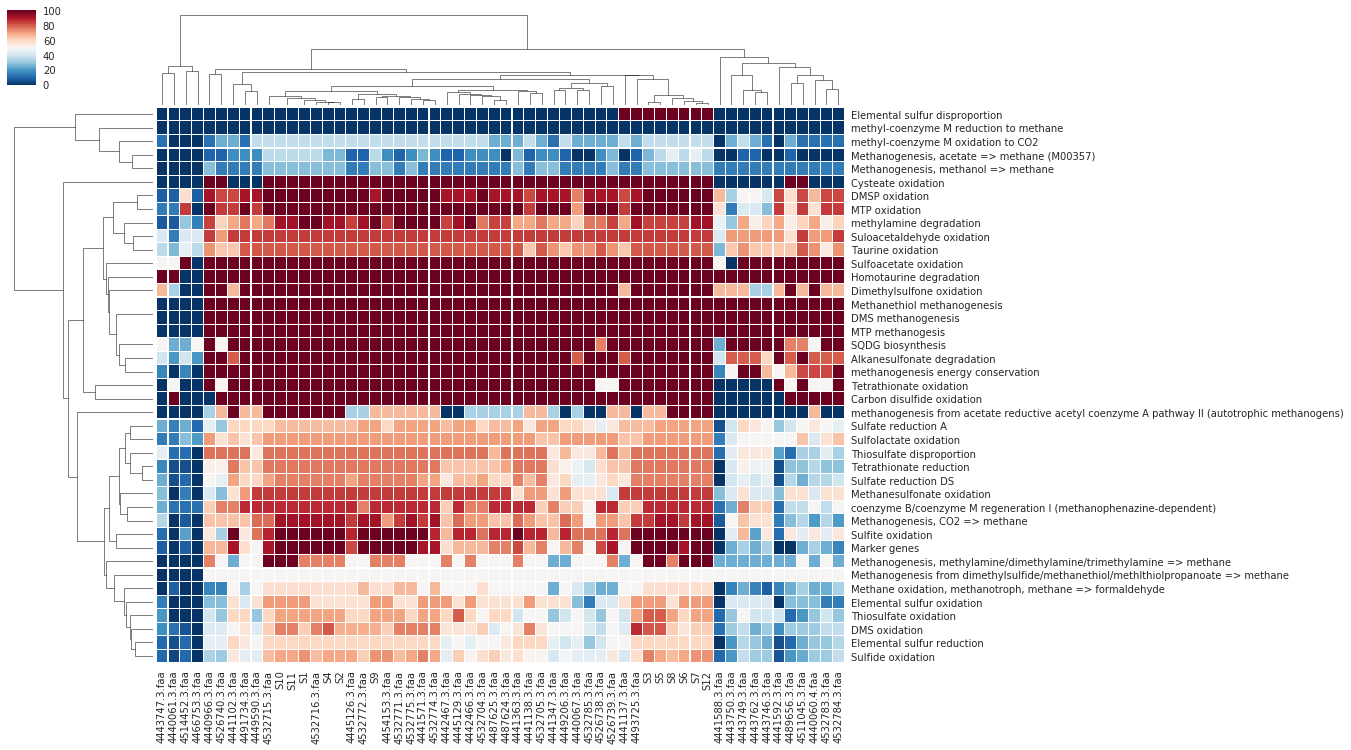

In [60]:
sns.set(font_scale=1)
axs = sns.clustermap(MEBS_comp, col_cluster=True, linewidths=0.1,cmap=sns.color_palette("RdBu_r", 100),
                     figsize=(15,12))
plt.tight_layout()
plt.savefig("../figures/completenessall.png", bbox_inches='tight', dpi=500)